## Instacart

Background: Instacart is a grocery ordering and delivery platform. It provides a very easy solution on in-store shopping. After selecting products through Instacart, personal shoppers sees your order and delivery the things you want to you after doing a in-store shopping.

In order to provide a better using experience as well as increasing the profits of the company, a big part of the app is to be able to predict and to do recommandation. Currectly, Instacart has this big dataset with more than a million user order history. By doing different analysis on the datastet and building various statistical models, we believe that we can try to predict what product will be in a shopper's bag next.

### References:
- https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2
- http://aisel.aisnet.org/cgi/viewcontent.cgi?article=1018&context=pacis2014

### Group Members:
Allen
- Planned and applied the decision tree for the datasets
- Interpreting the data within the datasets in order to help inspire team members on how to use it effectively 
- Facilitated idea generation within the group during the proposal phase
- With assistance of David, wrote the descriptions that explains the process of how we analyzed our data for the decision tree

David
- Organized meetings for the team
- Contributed ideas and led team discussions
- Kept track of ideas and options 
- Researched relevant materials and guided team members
- Assisted other members by solving issues

Riyang
- Discussed various topics with the group
- Completed the statistical approach which is the second method of the project
- Applied knowleage learned in the class and completed 4 sections which includes data exploring, data mining, data visualization, and data analysis. 
- Wrote descriptions of the second method and tried to walk through a reader

### Dataset(s):

- Dataset Name: aisles.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations: 133

A csv file which contains all the products and the IDs of the products.

- Dataset Name: departments.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations: 21

A csv file which contains the IDs of the departments and the departments' names

- Dataset Name: order_products_prior.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations:  more than a million

A csv file which contains previous order contents for all customers. Theu are order_id, product_id, add_to_cart_order, and reordered. The "reordered" indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. 

- Dataset Name: order_products_train.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations:  more than a million

A csv file that contains data that we will use for our decision tree's training.

- Dataset Name: orders.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations: more than a million

This file tells to which set(prior, train, test) an order belongs. Note that it is missing some data columns that may be of use to us.


- Dataset Name: products.csv
- Link to the dataset: https://www.kaggle.com/c/instacart-market-basket-analysis/data
- Number of observations: 490688

In our final project, we wanted to explore machine learning on a given dataset in order to see how effectively it can predict the outcome. More specifically, we explored the applications of a decision tree and it's ability to accurately predict outcomes given a large dataset.

### Research Question: 
How effective is a decision tree at providing accurate predictions, given a large dataset?

### Hypothesis: 
We believe that a decision tree would be moderately accurate, that is, it will have have a 50% overall accuracy in predicting the actual outcome of the event.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import norm

Importing all data sets for potential use.

In [2]:
products_df = pd.read_csv("products.csv")
orders_train_df = pd.read_csv("order_products__train.csv")
orders_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

Let's explore what the csv files contain.

In [3]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
orders_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
orders_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Upon looking at the dataset, we noticed that we do not necessarily need all the csv files in order to train our decision tree. More specifically, we only orders.csv. However, there are features missing in this dataframe that we would find beneficial (add_to_cart_order, reordered). As a result, we decided to merge our dataframes into one master dataframe to work off of.

In [9]:
df = pd.concat((orders_train_df, orders_prior_df), axis=0)
df = orders_df.merge(df, on='order_id', how='left')
df = df.dropna()

In [10]:
df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
5,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0
6,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0
7,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0
8,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0
9,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0
10,2398795,1,prior,2,3,7,15.0,13032.0,6.0,0.0
11,473747,1,prior,3,3,12,21.0,196.0,1.0,1.0
12,473747,1,prior,3,3,12,21.0,12427.0,2.0,1.0
13,473747,1,prior,3,3,12,21.0,10258.0,3.0,1.0
14,473747,1,prior,3,3,12,21.0,25133.0,4.0,0.0


Now that we have our master dataframe, we need to pre-process our dataframe in order to enable us to use this in a decision tree. At the same time, we also like to use only training data.

In [11]:
df2 = df

#need to set all columns as float types for the decision tree
df2.user_id = df.user_id.astype(float)
df2.order_dow = df.order_dow.astype(float)
df2.order_hour_of_day = df.order_hour_of_day.astype(float)
df2.product_id = df.product_id.astype(float)
df2 = df2[df2.eval_set == "train"] #filters dataframe to only contain training data

df2 = df2.dropna() #drop NaN values from dataframe

Instead of implementing our own decision tree, we decided to utilize the decision tree from the scikit-learn package. This would allow us to avoid any potential implementation flaws and it would allow us to dedicate more time to the objective of this project.

Now that our dataframe is ready to be loaded into a decision tree for training, we decided to attempt to predict the hour at which an order was placed, given the user ID, day of the week of the order, and how many days have passed since the last order of the user.

As a result of our goals, we define the target to be 'order_hour_of_day', and our features to be 'user_id', 'order_dow', 'days_since_prior_order'.

In [12]:
y = df2[['order_hour_of_day']]
x = df2[['user_id', 'order_dow', 'days_since_prior_order']]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

Now that our decision tree is made, we have to analyze the accuracy of our decision tree. To do this, we decided to randomly select 1000 orders from a dataframe that is filtered to contain none of the orders that was used in the training data. With this selection, we inputted the features of the 1000 orders into the decision tree to generate its list of predictions for each order. We compared these predictions to the actual outcome of the orders and counted the number of correct predictions. Then we divided this by the total amount of predictions to get our percentage. We repeated this experiment 100 times.

In [13]:
df_prior = df[df.eval_set == 'prior'] #filter our dataframe to only orders that were not used in the training data

percentArray = [] #declare array to contain all the percentages of our trials

#run experiment for 100 trials
for x in range(0, 100):
    df_sample = df_prior.sample(1000, replace=False) #grab random sample of 1000 from dataframe
    array_hour = df_sample['order_hour_of_day'].tolist() #convert the actual data to be used for np.where()
    array = dt.predict(df_sample[['user_id', 'order_dow', 'days_since_prior_order']]) #generate predicions
    predictList = np.where(array == array_hour) #get a list of indexes where the predictions are accurate
    numerator = len(predictList[0])
    percent = numerator/1000 #convert this list to a total number of correct predictions and divide it by total number of samples
    percentArray.append(percent) #convert to percent and append to array

With our data contained in percentArray, we plot this data on to a histogram chart.

In [56]:
#Turn the decimal values in the array to whole numbers
for x in range(0, len(percentArray)):
    percentArray[x] = percentArray[x]/100

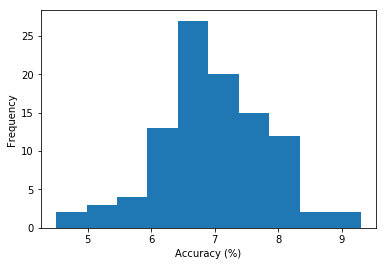

Average:  6.957


In [113]:
#plot the array

plt.hist(percentArray)
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.show()

print ("Average: ", np.mean(percentArray))

From the histogram and average alone, we can observe that we do not satisfy our hypothesis. The average accuracy of the decision tree model is 6.957%, which is significantly lower than our expected accuracy of 50% or higher. However, we did notice that our decision tree's accuracy percentage is higher than the random chance of guessing the order hour, which would be 4.167% (P(guess) = 1/24). 

## Failure Points of the Decision Tree:

In the design of our decision tree, we attempted to visualize this graph and we were mostly unsuccessful in generating the graph. We had only one attempt where it was successful, but found that the was the decision tree was extremely large and unreadable. As a result, we decided to not run the code to generate the tree.

On top of this method to generate our decision tree, we tested numerous combinations of features to predict different targets. Many of these combinations either created too large of a tree that resulted in errors, or did not give predictions that were worse than randomly guessing the outcome. 

We felt that the result of our decision tree was not sufficient enough. As a result, we decided to also run a statistical analysis and see if we could predict an outcome using this method.

## User Purchasing Analysis - Statistical Approach:
In this analysis, we are taking a statistical approach. We are using 3 datasets, order_products_prior, orders and products. We are using order_products_prior to get the user's purchase history; using orders to get specific products that user buy; using products to get names of the products from the product ids. We think that we can prodict what a user will buy next by considering two factors: what this customer buys often and what's the first product that he usually likes to put in his shopping cart. We believe that these two features can help us determine what product a specific user will most likely to buy next.

## Data Exploring

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from pandas import DataFrame
from scipy.stats import ttest_ind
from scipy.stats import norm

In [16]:
#getting the files ready
order_products_prior = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

orders = orders.dropna()
products = products.dropna()

#### Let's take a look at the product data

In [17]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Data Mining:
The datasets that we are using has too many features and some of them are not being used here. So we are going to start clean our data and remove extra features that we are not going to use.

We are starting from doing analysis on one user. We are going to try to predict one user so we are getting all the orders that this user has made into one data frame here from three different datasets

In [18]:
df = pd.DataFrame()
for order in orders[orders['user_id'] == 1]['order_id']:
        df = df.append(order_products_prior.loc[order_products_prior['order_id'] == order])

In [19]:
holder = 0
df['name'] = 0;
for product in df['product_id']:
    name = products.loc[products['product_id'] == product]['product_name'].iloc[0]
    df['name'].iloc[holder] = str(name)
    holder = holder + 1;

C:\Users\Ace\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#dropping extra features
df = df.drop('reordered', 1)
df = df.drop('product_id', 1)

In [21]:
#adding 1 to indicate the quantity of the product
df['number']  = 1;

In [22]:
#catogrizing products
productS = df.groupby('name')
productSum = productS.sum()
productSum = productSum.drop('add_to_cart_order', 1)
productSum = productSum.drop('order_id',1)

In [23]:
productSum.sort(columns='number')

C:\Users\Ace\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,number
name,
0% Greek Strained Yogurt,1
Organic Unsweetened Almond Milk,1
XL Pick-A-Size Paper Towel Rolls,1
Milk Chocolate Almonds,1
Honeycrisp Apples,1
Organic Fuji Apples,1
Bartlett Pears,1
Aged White Cheddar Popcorn,1
Creamy Almond Butter,1


#### Here, this data frame shows all the products that this user has bought and the number column indicates the amount of times that this user has bought each specific product. This data frame shows how frequent that this user buys a specific product.

## Data Visualizition

Now we are visualizing the data by ploting the data. First, we are observing a frequency bar table.

C:\Users\Ace\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


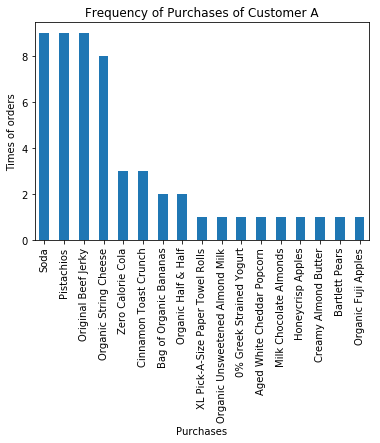

In [24]:
my_plot = productSum.sort(columns='number',ascending=False).plot(kind='bar',legend=None,title="Frequency of Purchases of Customer A")
my_plot.set_xlabel("Purchases")
my_plot.set_ylabel("Times of orders")

#### From this bar table, we see that this user buys "soda", "Pistachios" and "Original Beef Jerky" very often comparing with other products.

#### Now let's draw a priority table to show what the order of adding each product to his shopping cart. 

In [25]:
pv = pd.pivot_table(df, values = ['add_to_cart_order'], index=['order_id','name'])
pv.head()

add_to_cart_order
order_id name                                     
431534   Bag of Organic Bananas                  8
         Bartlett Pears                          7
         Honeycrisp Apples                       6
         Organic Fuji Apples                     5
         Organic String Cheese                   4

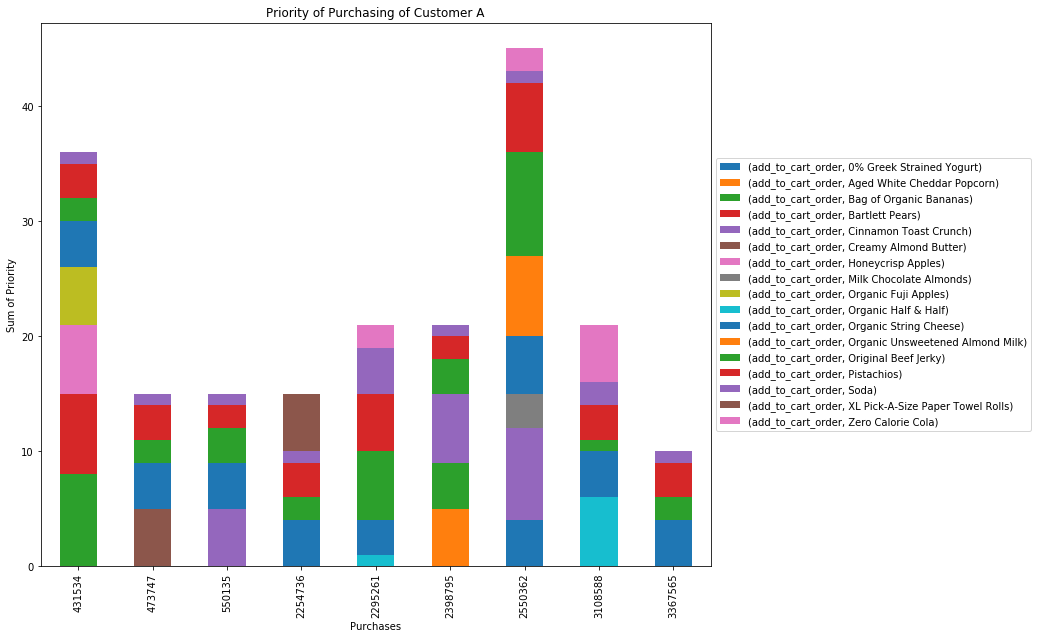

In [26]:
my_plot = pv.unstack().plot(kind='bar',stacked=True,title="Priority of Purchasing of Customer A", figsize=(12, 10), sort_columns = True)
my_plot.set_xlabel("Purchases")
my_plot.set_ylabel("Sum of Priority")
my_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### The length of each area represents the order. The shorter area a color has, the more prioritized it is. We can see from the bar table that the paper bar, which is "soda", is added to the shopping cart first. 

## Data Analysis:

The analysis method which is going to be used here is to discover if there is a correlation between the order of purchasing and the frequency of purchasing. Based on the visualization above, we see that there may be a connection between the two graphs. We want to know that if the first thing that a customer buys in every purchase is the most frequent product that the user buys or not.

#### First, we are now going to combine our two data frames into one in order to calculate the correlation. 

In [27]:
#Adding a priority_point column for each row
df['priority_point'] = 0
counter = 0
inc = 0
count = 0
point = df.groupby('order_id', sort = False)
for i in df['order_id']:
    
    max = point.size().iloc[count]
    df['priority_point'].iloc[counter] = max + 1 - df['add_to_cart_order'].iloc[counter]
    counter = counter + 1
    inc = inc + 1
    if ( max == inc ):
        count = count + 1
        inc = 0

C:\Users\Ace\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
#productSum the total number of purchases of each product
df['priority_sum'] = 0;
holder = 0
for name in df['name']:
    sum = df.loc[df['name'] == name]['priority_point'].sum()
    df['priority_sum'].iloc[holder] = str(sum)
    holder = holder + 1

C:\Users\Ace\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
df.head()

,order_id,add_to_cart_order,name,number,priority_point,priority_sum
22742744,2398795,1,Soda,1,6,50
22742745,2398795,2,Pistachios,1,5,33
22742746,2398795,3,Original Beef Jerky,1,4,33
22742747,2398795,4,Bag of Organic Bananas,1,3,4
22742748,2398795,5,Aged White Cheddar Popcorn,1,2,2


#### The "priority_sum" is calculated by adding the "priority_point" for each product. A product has a higher "priority_point" means more priority. 

In [30]:
#getting ready for calculating the corr
pri_ptr = df.drop('order_id',1)
pri_ptr = pri_ptr.drop('add_to_cart_order',1)
pri_ptr = pri_ptr.drop('number',1)
pri_ptr = pri_ptr.drop('priority_point', 1)

In [31]:
#combine two datafram into one
pri_ptr['frequency'] = 0
holder = 0
productSum['name'] = productSum.index
for name in pri_ptr['name']:
    number = productSum.loc[productSum['name'] == name]['number'].iloc[0]
    pri_ptr['frequency'].iloc[holder] = str(number)
    holder = holder + 1

C:\Users\Ace\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
pri_ptr['priority_sum'] = pd.to_numeric(pri_ptr['priority_sum'], errors='coerce')
pri_ptr['frequency'] = pd.to_numeric(pri_ptr['frequency'], errors='coerce')

#### Here, we are going to finally see the two features in one graph. Let's plot a bar graph. 

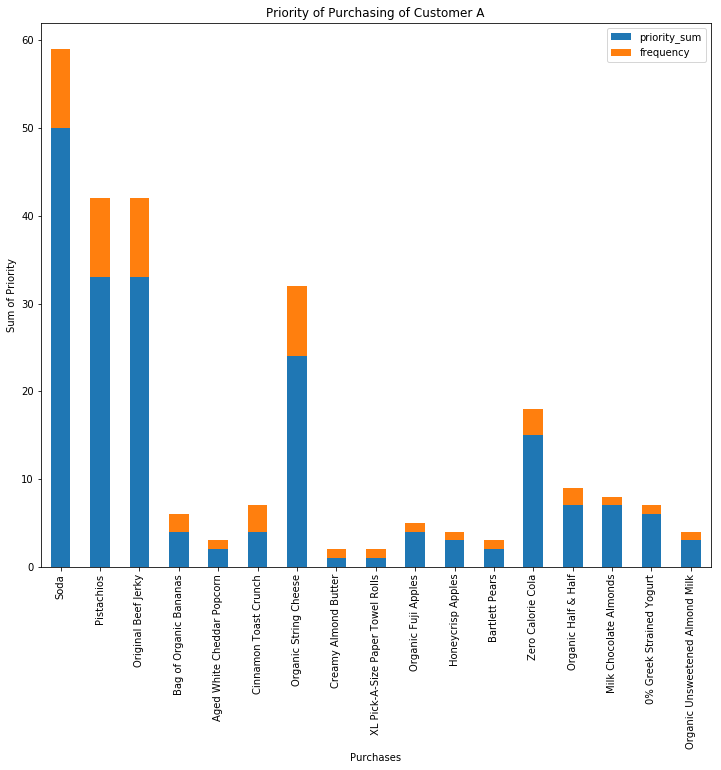

In [33]:
pri_ptr = pri_ptr.drop_duplicates()
my_plot = pri_ptr.set_index('name').plot(kind='bar',stacked=True,title="Priority of Purchasing of Customer A", figsize=(12, 10), sort_columns = False)
my_plot.set_xlabel("Purchases")
my_plot.set_ylabel("Sum of Priority")


#### From this graph, we can see that for each product, a high value of frequency often comes with a high value of priority. Now, let's calculate the correlation of frequency and priority mathematically.

In [34]:
pri_ptr['priority_sum'].corr(pri_ptr['frequency'])

0.94068511838955537

#### This result is 0.9 which indicates a strong linear correlation between the frequency and priority. 

In [35]:
pri_ptr = pri_ptr.drop_duplicates()

In [36]:
pri_ptr.corr()

,priority_sum,frequency
priority_sum,1.000000,0.940685
frequency,0.940685,1.000000


#### Finally, let's calculate the regression.

In [37]:
outcome_1, predictors_1 = patsy.dmatrices('priority_sum ~ frequency', pri_ptr)
mod_1 = sm.OLS(outcome_1, predictors_1)

# Fit the model
res_1 = mod_1.fit()

In [38]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           priority_sum   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 13 Jun 2017   Prob (F-statistic):           1.94e-08
Time:                        20:08:48   Log-Likelihood:                -50.680
No. Observations:                  17   AIC:                             105.4
Df Residuals:                      15   BIC:                             107.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5590      1.744     -0.894      0.3

C:\Users\Ace\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


#### We get 0.885 for the R-squared value and 0.000 for the P value. It indicates that we can actually predict the priority based on the frequency.

## Statistical Approach Result

It's pretty impressive but also foreseeable that there is strong linear correlation between the frequency and the priority. And both of the feature supports the probability of buying a specific product. The higher the frequency is, the higher the priority is; as a result, the higher chance that the user is going to buy this product.


### Conclusion:

Data Science is hard. 🙂 We utilized several methods of attacking our data sets to gain insight from future datasets. 
Using a decision tree, our model was inaccurate. This was perhaps due to using the wrong feature and/or training data. 
We tried many variations but could never get it to work with a high accuracy. 
If we had more processing power perhaps we could have simply used all the features to create a more accurate model. 
Then we tried to take a statistical approach. After plotting the "frequency" and "priority" graphs, we thought we could predict based on these two features. In order to prove our supposition, we calculated the correlation between these two features. We got a strong linear correlation as our mathematical result, which was 0.9. Then we also calculated regression on predicting frequency from priority, we got 0.88 as our R-Squared value and 0.00 as our P value. At the end, we also graphed a bar graph which had two features in order to visualize the correlation. We think we can predict what a user is going to buy next based on these two features. 

### Future work: 

We've learned a great deal about decision trees and what they are capable of. In the future we would like to conduct this experiment again with better feature selection and more processing power to see the full extent of the capabilities of a decision tree.